# ***Packaging***

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***1. Data loading, data type correction, and removal of irrelevant variables***

In [150]:
#Loading data as df (dataframe)
df = pd.read_excel('Portfolio Puma MGM.xlsx', sheet_name=0)
df.head(2)

,Case Name,Account Name,State,Rate,Provider Client,DOL,Subject,Name of Procedure,Case Stage,Stage Chg Dt,...,Inv 1 Pd Dt,Inv 1 Pd $,Inv 2 Pd Dt,Inv 2 Pd $,Inv 3 Pd Dt,Inv 3 Pd $,Funding Status,Case Notes,Lien Notes,Case Status
0,Sundae McGrath,Ace Law Group,NaN,NaN,Pueblo Medical Imaging,09/06/2018,SMcGrath1,MRI Lumbar Spine wo Contrast,Completed,01/21/2025,...,01/20/2025,907.5,NaN,0.0,NaN,0.0,Purchased,NaN,"02,20 Settled",request has been sent to the finance departmen...
1,Sumala Chuencharoewong,Ace Law Group,NaN,NaN,Pueblo Medical Imaging,NaN,SChuen1,MRI Cervical Spine wo Contrast,Completed,09/28/2023,...,05/27/2020,940.5,NaN,NaN,NaN,NaN,Purchased,NaN,NaN,Payment DT 05-27-2020 \n


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Case Name          4008 non-null   object 
 1   Account Name       4008 non-null   object 
 2   State              39 non-null     object 
 3   Rate               764 non-null    object 
 4   Provider Client    3997 non-null   object 
 5   DOL                3137 non-null   object 
 6   Subject            4008 non-null   object 
 7   Name of Procedure  3483 non-null   object 
 8   Case Stage         4008 non-null   object 
 9   Stage Chg Dt       4002 non-null   object 
 10  DOS                3999 non-null   object 
 11  Batch Dt           3987 non-null   object 
 12  Bill Amt           4008 non-null   float64
 13  Purch Amt          4008 non-null   float64
 14  Purch Dt           3990 non-null   object 
 15  Investor 1         4007 non-null   object 
 16  Port 1             3976 

In [152]:
# Antes de eliminar variables irrelevantes eliminamos los registros que no tienen fecha de pago
df = df.dropna(subset=['Pay Dt'])

# ***2. Eliminar variables irrelevantes y redundantes***
* Irrelevantes: cedulas, ids, nombres, telefonos, direcciones, códigos.
* Redundantes: validación por fórmula matemática que están repetidas

In [153]:
# Removal of irrelevant variables
irrelevant_variables = ['Case Name','Inv 1 Pd Dt','Inv 2 Pd Dt','Inv 3 Pd Dt','Case Notes','Lien Notes','Case Status','DOL','DOS','Investor 1','Port 1','Investor 2','Port 2','State','Inv 1 Purch $','Inv 2 Purch $','Inv 1 Pd $','Inv 2 Pd $','Inv 3 Pd $','Rate','Stage Chg Dt','Batch Dt','Pay Dt', 'Case Stage','Name of Procedure','Purch Dt']
df = df.drop(irrelevant_variables, axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account Name     4008 non-null   object 
 1   Provider Client  3997 non-null   object 
 2   Subject          4008 non-null   object 
 3   Bill Amt         4008 non-null   float64
 4   Purch Amt        4008 non-null   float64
 5   Pay Amt          3999 non-null   float64
 6   Funding Status   3998 non-null   object 
dtypes: float64(3), object(4)
memory usage: 219.3+ KB


In [154]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Funding Status
0,Ace Law Group,Pueblo Medical Imaging,SMcGrath1,1650.0,462.0,907.5,Purchased
1,Ace Law Group,Pueblo Medical Imaging,SChuen1,1650.0,462.0,940.5,Purchased
2,Ace Law Group,Pueblo Medical Imaging,CChuench1,1650.0,462.0,990.0,Purchased
3,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0,Purchased
4,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0,Purchased


In [155]:
# Data type casting (corrections)
categorical_columns = ['Account Name','Provider Client','Funding Status','Subject']
df[categorical_columns] = df[categorical_columns].astype('category')

numerical_columns = ['Bill Amt', 'Purch Amt','Pay Amt']
df[numerical_columns] = df[numerical_columns].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4008 non-null   category
 1   Provider Client  3997 non-null   category
 2   Subject          4008 non-null   category
 3   Bill Amt         4008 non-null   float64 
 4   Purch Amt        4008 non-null   float64 
 5   Pay Amt          3999 non-null   float64 
 6   Funding Status   3998 non-null   category
dtypes: category(4), float64(3)
memory usage: 122.7 KB


# ***3. Statistical analysis***

In [156]:
df['Account Name'].unique()

['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', ..., 'VC2 Law', 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm  CA', 'Yagoubzadeh Law Firm', 'Yan Kenyon Law']
Length: 85
Categories (85, object): ['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', ..., 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm  CA', 'Yagoubzadeh Law Firm', 'Yan Kenyon Law']

<Axes: xlabel='Provider Client'>

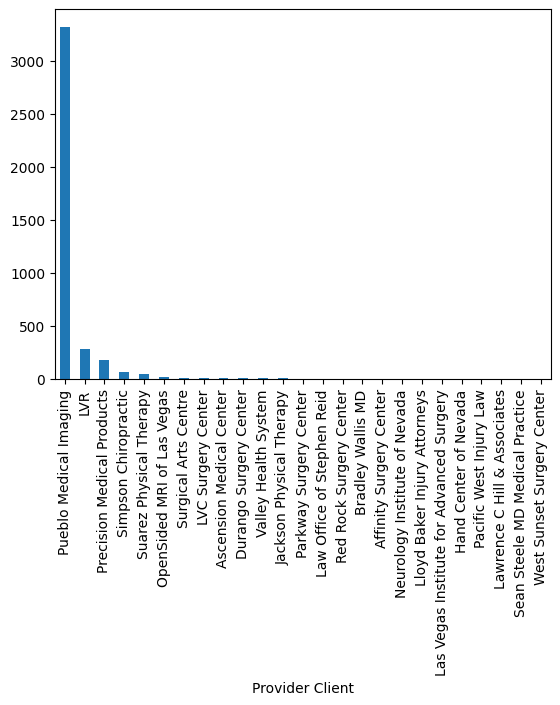

In [157]:
df['Provider Client'].value_counts().plot(kind='bar')

<Axes: xlabel='Subject'>

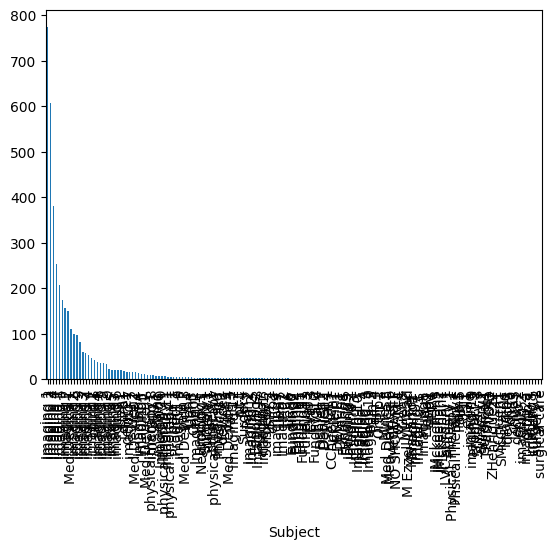

In [158]:
df['Subject'].value_counts().plot(kind='bar')

In [159]:
# print(df['Subject'].unique())
print(list(df['Subject'].unique()))

['SMcGrath1', 'SChuen1', 'CChuench1', 'Lien1', 'Lien2', 'imaging 1', 'imaging 2', 'imaging 3', 'imaging1', 'imaging2', 'pain1', 'imaging3', 'Imaging1', 'Imaging2', 'Imaging 1', 'Imaging 2', 'Imaging 3', 'Imaging 5', 'Imaging 4', 'Pain 1', 'Surgery1', 'Imaging 1 ', 'Surgery', 'Imaging 6', 'imaging4', 'Imaging  2', 'Imaging  3', 'PT1', 'PT 1', 'Physical 1', 'physicaltherapy 1', 'PT 2', 'PT 3', 'surgery1', 'SPT 1', 'Med Device 1', 'Med Device 2', 'pain 1', 'chiro 1', 'chiro1', 'Product 1', 'Med Device 3', 'Med Device 4', 'Med Device 1 ', 'device1', 'device2', 'Product 2', 'imaging5', 'imaging6', 'Pain1', 'Pain2', 'Pain 4', 'Pain 5', 'Imaging3', 'Imaging4', 'Imaging 7', 'Imaging 8', 'Imaging 9', 'imaging 10', 'Imaging 11', 'Imaging 12', 'imaging 1 ', 'surgical care', 'physicaltherapy1', 'imaging 4', 'imaging 5', 'imaging 6', 'JPT 1', 'Funding1', 'Funding2', 'LVC surgery 1', 'CKlein1', 'JMckeehan1', 'JMckeehan2', 'JMckeehan3', 'MInes1', 'MInes2', 'MNavarro1', 'Lien3', 'Lien4', 'Imaging5', '

<Axes: xlabel='Funding Status'>

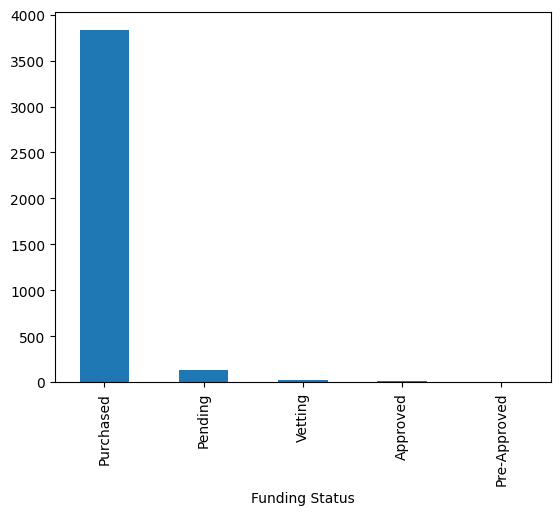

In [160]:
df['Funding Status'].value_counts().plot(kind='bar')

<Axes: >

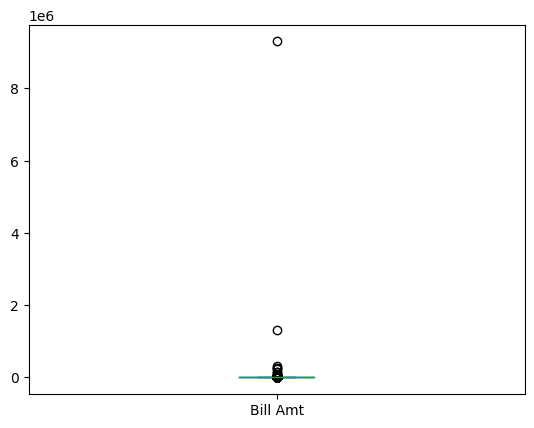

In [161]:
df['Bill Amt'].plot(kind='box')

<Axes: >

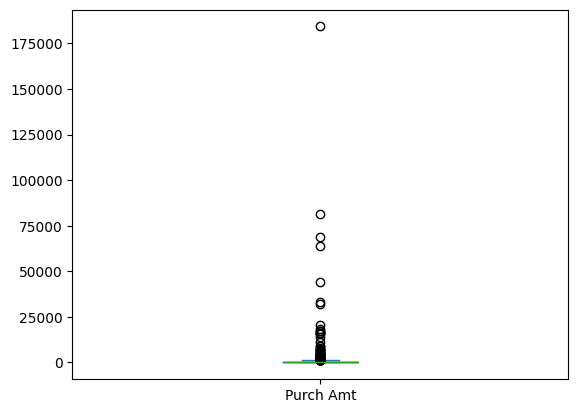

In [162]:
df['Purch Amt'].plot(kind='box')

<Axes: >

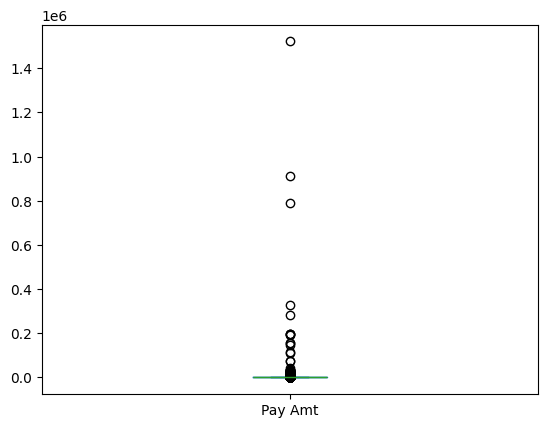

In [163]:
df['Pay Amt'].plot(kind='box')

In [164]:
# from ydata_profiling import ProfileReport

# profile_data=ProfileReport(df, minimal=True) # minimal=True
# profile_data

# ***4. Limpeza de datos y atípicos por errores***

### ***Eliminación de procesos aún no terminados para el análisis de ROI de los terminados***

In [165]:
df['Funding Status'].unique()

['Purchased', 'Pre-Approved', 'Pending', 'Approved', 'Vetting', NaN]
Categories (5, object): ['Approved', 'Pending', 'Pre-Approved', 'Purchased', 'Vetting']

In [166]:
# Se eliminan los registros que hayan sido declined porque no se tiene información completa de ellos y los que nos importa analizar son los comprados

indices_a_eliminar = df[df['Funding Status'] != 'Purchased'].index

# Eliminar esas filas usando drop(axis=0)
df.drop(indices_a_eliminar, axis=0, inplace=True)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3832 entries, 0 to 4007
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3832 non-null   category
 1   Provider Client  3822 non-null   category
 2   Subject          3832 non-null   category
 3   Bill Amt         3832 non-null   float64 
 4   Purch Amt        3832 non-null   float64 
 5   Pay Amt          3825 non-null   float64 
 6   Funding Status   3832 non-null   category
dtypes: category(4), float64(3)
memory usage: 147.5 KB


In [168]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Funding Status
0,Ace Law Group,Pueblo Medical Imaging,SMcGrath1,1650.0,462.0,907.5,Purchased
1,Ace Law Group,Pueblo Medical Imaging,SChuen1,1650.0,462.0,940.5,Purchased
2,Ace Law Group,Pueblo Medical Imaging,CChuench1,1650.0,462.0,990.0,Purchased
3,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0,Purchased
4,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0,Purchased


<Axes: xlabel='Funding Status'>

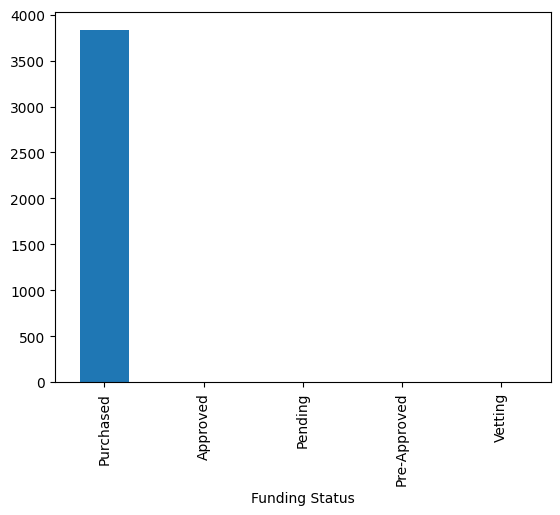

In [169]:
df['Funding Status'].value_counts().plot(kind='bar')

In [170]:
# Como todos los datos pertenecen a la cateoría Purchased de Funding Status entonces eliminamos esta variable por ser redundante
df = df.drop('Funding Status', axis=1)

### ***Existen procesos que a pesar de haber sido comprados aún no se han terminado porque están a la espera de que el abogado pague (Pay amt = nan) por lo que estos registros no se pueden utilizar porque se utiliza Pay amt para calcular nuestra variable objetivo***

In [171]:
# Se eliminan  los registros donde Pay amt sea nula
df = df.dropna(subset=['Pay Amt'])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3825 entries, 0 to 4007
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3825 non-null   category
 1   Provider Client  3815 non-null   category
 2   Subject          3825 non-null   category
 3   Bill Amt         3825 non-null   float64 
 4   Purch Amt        3825 non-null   float64 
 5   Pay Amt          3825 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 143.3 KB


In [173]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
0,Ace Law Group,Pueblo Medical Imaging,SMcGrath1,1650.0,462.0,907.5
1,Ace Law Group,Pueblo Medical Imaging,SChuen1,1650.0,462.0,940.5
2,Ace Law Group,Pueblo Medical Imaging,CChuench1,1650.0,462.0,990.0
3,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0
4,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0


### ***Limpieza de errores en los datos y unificación de categorías válidas mediante uso de expresiones regulares***

In [174]:
df['Subject'].unique()

['SMcGrath1', 'SChuen1', 'CChuench1', 'Lien1', 'Lien2', ..., 'ortho 1', 'Eval 1', 'Eval 2', 'Eval 3', 'Eval 4']
Length: 164
Categories (169, object): ['CChuench1', 'CKlein1', 'Chiro1', 'DEVICE1', ..., 'surgery 1', 'surgery 2', 'surgery1', 'surgical care']

<Axes: xlabel='Subject'>

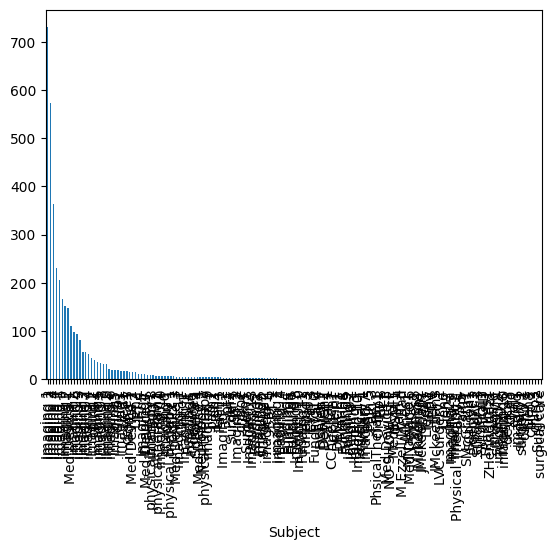

In [175]:
df['Subject'].value_counts().plot(kind='bar')

In [176]:
df['Subject'] = (
    df['Subject']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)        # espacios múltiples a uno
    .str.replace(r'[^\w\s]', ' ', regex=True)    # caracteres especiales a espacio
    .str.replace(r'\s+', ' ', regex=True)        # limpiar espacios de nuevo
    .str.strip()                                  # eliminar espacios inicio/fin
    .str.replace(r'\d+', '', regex=True)         # eliminar números (imaging1 → imaging)
    .str.strip()                                  # limpiar espacios finales
)
# Creación de columna de limpieza
df['Subject_Clean'] = np.nan

In [177]:
# Definir mapeo de agrupación
mapeo = {
    r'^(?:imaging|iamging|imagine|imagin|imagiong|imag)': 'Imaging',
    r'^(?:surg|surgical|lcv|lvc|surgical\s*care)': 'Surgery',
    r'^(?:med\s*dev|device|decive|product|mec\s*device|medprod)': 'Medical Device',
    r'^(?:pt|spt|jpt|physical|phsicaltherapy|phystherapy)': 'Physical Therapy',
    r'^(?:chiro|ad\s*chiro)': 'Chiropractic',
    r'^pain': 'Pain Management',
    r'^(?:neuro|neurology)': 'Neurology',
    r'^(?:eval|medeval|consult)': 'Evaluation',
    r'^lab': 'Laboratory',
    r'^ortho': 'Orthopedics',
    r'^lien': 'Lien',
    r'^pharmacy': 'Pharmacy',
    r'^(?:psych)': 'Psychiatry',
    r'^er$': 'Emergency Room',
    r'^amnio': 'Amniocentesis',
    r'^(?:funding|void|osm|oms|sac|has|adc|no\s*show|loan|test)': 'Administrative',
    r'^procedure': 'Medical Procedure'
}

for pattern, category in mapeo.items():
    mask = df['Subject'].str.contains(pattern, regex=True, na=False)
    df.loc[mask, 'Subject_Clean'] = category

print(f"\nCategorización por patrones completada")
print(f"Registros categorizados: {df['Subject_Clean'].notna().sum()}")
print(f"Registros sin categorizar: {df['Subject_Clean'].isna().sum()}")

uncategorized = df[df['Subject_Clean'].isna()]['Subject'].unique()

# Reemplazamos los datos de Subject por los limpiados
df['Subject'] = df['Subject_Clean']
df = df.drop('Subject_Clean', axis=1)


Categorización por patrones completada
Registros categorizados: 3807
Registros sin categorizar: 18


/tmp/ipykernel_13291/3533853691.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Imaging' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'Subject_Clean'] = category


In [178]:
uncategorized

array(['smcgrath', 'schuen', 'cchuench', 'cklein', 'jmckeehan', 'mines',
       'mnavarro', 'dmarin', 'zhenriquez', 'dshieh', 'm ezzell lv rad',
       'tparhms', 'lteng', 'primary'], dtype=object)

In [179]:
df['Subject'].unique()

array([nan, 'Lien', 'Imaging', 'Pain Management', 'Surgery',
       'Physical Therapy', 'Medical Device', 'Chiropractic',
       'Administrative', 'Evaluation', 'Neurology', 'Orthopedics'],
      dtype=object)

In [180]:
df['Subject'].value_counts()

Subject
Imaging             3386
Medical Device       178
Chiropractic          66
Physical Therapy      55
Lien                  46
Pain Management       28
Surgery               18
Administrative        18
Evaluation             6
Neurology              4
Orthopedics            2
Name: count, dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3825 entries, 0 to 4007
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3825 non-null   category
 1   Provider Client  3815 non-null   category
 2   Subject          3807 non-null   object  
 3   Bill Amt         3825 non-null   float64 
 4   Purch Amt        3825 non-null   float64 
 5   Pay Amt          3825 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 160.3+ KB


### ***Organización de categorías de Account Name***

In [182]:
print(list(df['Account Name'].unique()))

['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law  California', 'Beverly Law', 'Bighorn Law  Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers  CA', 'Jacoby & Meyers  CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm  CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3825 entries, 0 to 4007
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3825 non-null   category
 1   Provider Client  3815 non-null   category
 2   Subject          3807 non-null   object  
 3   Bill Amt         3825 non-null   float64 
 4   Purch Amt        3825 non-null   float64 
 5   Pay Amt          3825 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 160.3+ KB


In [184]:
df['Account Name'] = (
    df['Account Name']
    .astype(str)
    .str.strip()
    # .str.lower()
    .str.replace(r'\s+', ' ', regex=True)          # Espacios múltiples → uno
    .str.replace(r'[^\w\s&]', '', regex=True)      # Eliminar símbolos raros (excepto &)
    .str.strip()
)
# Creación de columna de limpieza
df['AccountName_Clean'] = np.nan

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3825 entries, 0 to 4007
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Account Name       3825 non-null   object  
 1   Provider Client    3815 non-null   category
 2   Subject            3807 non-null   object  
 3   Bill Amt           3825 non-null   float64 
 4   Purch Amt          3825 non-null   float64 
 5   Pay Amt            3825 non-null   float64 
 6   AccountName_Clean  0 non-null      float64 
dtypes: category(1), float64(4), object(2)
memory usage: 213.7+ KB


In [186]:
unique_clean = []

from rapidfuzz import fuzz

for firm in df['Account Name'].unique():
    clean = firm.strip()
    match_found = False
    for ref in unique_clean:
        if fuzz.ratio(clean, ref) > 80:   # Umbral de similitud
            match_found = True
            df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = ref
            break
    if not match_found:
        unique_clean.append(clean)
        df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = clean

/tmp/ipykernel_13291/3216805034.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Ace Law Group' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = clean


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3825 entries, 0 to 4007
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Account Name       3825 non-null   object  
 1   Provider Client    3815 non-null   category
 2   Subject            3807 non-null   object  
 3   Bill Amt           3825 non-null   float64 
 4   Purch Amt          3825 non-null   float64 
 5   Pay Amt            3825 non-null   float64 
 6   AccountName_Clean  3825 non-null   object  
dtypes: category(1), float64(3), object(3)
memory usage: 213.7+ KB


In [188]:
# --- Reemplazar columna original por la limpia ---
df['Account Name'] = df['AccountName_Clean']
df = df.drop('AccountName_Clean', axis=1)

print(list(df['Account Name'].unique()))

['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law California', 'Beverly Law', 'Bighorn Law Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers CA', 'Jacoby & Meyers CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 'Law 

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3825 entries, 0 to 4007
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3825 non-null   object  
 1   Provider Client  3815 non-null   category
 2   Subject          3807 non-null   object  
 3   Bill Amt         3825 non-null   float64 
 4   Purch Amt        3825 non-null   float64 
 5   Pay Amt          3825 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 183.8+ KB


In [190]:
df[~((df['Account Name'].map(df['Account Name'].value_counts()) < 2) & (df['Pay Amt'].isna()))]
print(list(df['Account Name'].unique()))

['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law California', 'Beverly Law', 'Bighorn Law Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers CA', 'Jacoby & Meyers CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 'Law 

In [191]:
df = df[df['Account Name'].map(df['Account Name'].value_counts()) > 2]
print(list(df['Account Name'].unique()))


['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law California', 'Beverly Law', 'Bighorn Law Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers CA', 'Jacoby & Meyers CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 'Law 

In [192]:
len(list(df['Account Name'].unique()))
# Quedaron un total de 84 categorías

84

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3823 entries, 0 to 4007
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3823 non-null   object  
 1   Provider Client  3813 non-null   category
 2   Subject          3805 non-null   object  
 3   Bill Amt         3823 non-null   float64 
 4   Purch Amt        3823 non-null   float64 
 5   Pay Amt          3823 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 183.7+ KB


### ***Organización de categorías de Provider Client***
**Para esta variable todas las categorías coinciden con las variables válidas en el negocio**

In [194]:
print(list(df['Provider Client'].unique()))

['Pueblo Medical Imaging', 'LVR', 'Durango Surgery Center', 'Valley Health System', 'Parkway Surgery Center', 'West Sunset Surgery Center', 'Suarez Physical Therapy', 'Jackson Physical Therapy', 'Precision Medical Products', 'Ascension Medical Center', 'Simpson Chiropractic', 'Law Office of Stephen Reid', 'Surgical Arts Centre', 'OpenSided MRI of Las Vegas', 'LVC Surgery Center', 'Sean Steele MD Medical Practice', 'Red Rock Surgery Center', nan, 'Affinity Surgery Center', 'Hand Center of Nevada', 'Lawrence C Hill & Associates', 'Lloyd Baker Injury Attorneys', 'Neurology Institute of Nevada', 'Bradley Wallis MD', 'Pacific West Injury Law']


In [195]:
len(list(df['Provider Client'].unique()))

25

### ***Eliminación de duplicados***

Muchas veces se presenta la combinación de que la misma firma de abogados atiende en el mismo consultorio médico (Provider) el grupo de familiares que tuvo el accidente el mismo día y se realizan diferentes bills pero con la misma información de cobro y compra por lo que aparecen como duplicados, estos los eliminamos

In [196]:
df[df.duplicated()]

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
4,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,825.00
6,Ace Law Group,LVR,Imaging,1650.0,495.0,990.00
7,Ace Law Group,LVR,Imaging,1650.0,495.0,990.00
9,Ace Law Group,LVR,Imaging,1650.0,495.0,907.50
13,Ace Law Group,LVR,Imaging,1650.0,495.0,660.00
...,...,...,...,...,...,...
4000,Yan Kenyon Law,Ascension Medical Center,Evaluation,700.0,210.0,697.18
4003,Yan Kenyon Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,897.50
4005,Yan Kenyon Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,1068.00
4006,Yan Kenyon Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,1795.00


In [197]:
# Contar duplicados exactos de todas las columnas
duplicados = df.value_counts().reset_index(name='Repeticiones')

# Filtrar los que aparecen más de una vez
duplicados = duplicados[duplicados['Repeticiones'] > 1]

duplicados.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Repeticiones
0,Law Office of Stephen Reid,Pueblo Medical Imaging,Imaging,150.0,42.0,90.0,126
1,Ace Law Group,Pueblo Medical Imaging,Imaging,1795.0,503.0,897.5,82
2,Goldberg Injury Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,897.5,79
3,Lloyd Baker Injury Attorneys,Pueblo Medical Imaging,Imaging,1795.0,503.0,897.5,77
4,Law Office of Stephen Reid,Pueblo Medical Imaging,Imaging,1650.0,462.0,990.0,72


In [198]:
duplicados['Repeticiones'].sum()

np.int64(3069)

In [199]:
# Antes de realizar la imputación se eliminan duplicados
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 0 to 4004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1350 non-null   object  
 1   Provider Client  1345 non-null   category
 2   Subject          1337 non-null   object  
 3   Bill Amt         1350 non-null   float64 
 4   Purch Amt        1350 non-null   float64 
 5   Pay Amt          1350 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 65.3+ KB


# ***5. Limpieza de datos nulos: Imputación***

Estrategia:
* Eliminar registros con mas de 15% de nulos
* Eliminar columnas con mas de 15%-20% de nulos
* Imputar por media, moda, mediana, vecinos cercanos. No se puede imputar más allá del 15% de los datos.
* Para casos especiales se crea modelo predictivo

In [200]:
#Corrección del tipo de datos object a categorías
categorical_columns = ['Account Name', 'Subject','Provider Client']
df[categorical_columns] = df[categorical_columns].astype('category')

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 0 to 4004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1350 non-null   category
 1   Provider Client  1345 non-null   category
 2   Subject          1337 non-null   category
 3   Bill Amt         1350 non-null   float64 
 4   Purch Amt        1350 non-null   float64 
 5   Pay Amt          1350 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 50.0 KB


### ***Creación de una nueva variable ROI***

In [202]:
# ROI por registro
df['ROI'] = np.where(df['Purch Amt'] > 0,
                     (df['Pay Amt'] - df['Purch Amt']) / df['Purch Amt'],
                     np.nan)

# Mostrar resumen y primeros registros
print(df['ROI'].describe())
print(df[['Purch Amt','Pay Amt','ROI']].head(10))


count    1350.000000
mean        3.533106
std        17.620873
min        -1.000000
25%         0.666667
50%         0.882353
75%         1.202250
max       337.458874
Name: ROI, dtype: float64
    Purch Amt  Pay Amt       ROI
0       462.0    907.5  0.964286
1       462.0    940.5  1.035714
2       462.0    990.0  1.142857
3       462.0    825.0  0.785714
5       495.0    990.0  1.000000
8       495.0    907.5  0.833333
10      495.0    445.5 -0.100000
11      495.0   1725.0  2.484848
12      495.0    660.0  0.333333
15      495.0    742.5  0.500000


In [203]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,ROI
0,Ace Law Group,Pueblo Medical Imaging,NaN,1650.0,462.0,907.5,0.964286
1,Ace Law Group,Pueblo Medical Imaging,NaN,1650.0,462.0,940.5,1.035714
2,Ace Law Group,Pueblo Medical Imaging,NaN,1650.0,462.0,990.0,1.142857
3,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,825.0,0.785714
5,Ace Law Group,LVR,Imaging,1650.0,495.0,990.0,1.000000


In [206]:
df.describe()

,Bill Amt,Purch Amt,Pay Amt,ROI
count,1.350000e+03,1350.000000,1.350000e+03,1350.000000
mean,9.846172e+03,855.850385,4.516058e+03,3.533106
std,2.532584e+05,3818.704391,5.102452e+04,17.620873
min,0.000000e+00,6.710000,0.000000e+00,-1.000000
25%,2.256025e+02,71.250000,1.586925e+02,0.666667
50%,1.650000e+03,462.000000,8.944500e+02,0.882353
75%,1.795000e+03,503.000000,1.250713e+03,1.202250
max,9.293091e+06,81353.930000,1.520925e+06,337.458874


In [207]:
max_roi = df['ROI'].max()
df[df['ROI'] == max_roi]

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,ROI
682,G Dallas Horton & Associates,Pueblo Medical Imaging,Imaging,1650.0,462.0,156368.0,337.458874


In [208]:
df.nlargest(5, 'ROI')

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,ROI
682,G Dallas Horton & Associates,Pueblo Medical Imaging,Imaging,1650.0,462.00,156368.0,337.458874
686,G Dallas Horton & Associates,Suarez Physical Therapy,Administrative,0.0,7580.63,1520925.0,199.633061
677,G Dallas Horton & Associates,Durango Surgery Center,Pain Management,14021.0,4626.93,911365.0,195.969697
736,G Dallas Horton & Associates,Simpson Chiropractic,Chiropractic,3555.0,1137.00,195525.0,170.965699
738,G Dallas Horton & Associates,Simpson Chiropractic,Chiropractic,3555.0,1137.60,195525.0,170.875000


In [209]:
#Para estos datos se realiza un supuesto de que hubo un error en el ingreso de los datos en Purch Amt y se eliminan estos registros
df = df[df['Purch Amt'].notna() & (df['Purch Amt'] > 0)]

In [210]:
# Como el ROI es un cálculo y otra manera de expresar Pay Amt se vuelve irrelevante esta última variable y se elimina
df = df.drop('Pay Amt', axis=1)

In [211]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
var_numericas = ['Bill Amt','Purch Amt']
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
df[var_numericas] = ImpNumeros.fit_transform(df[var_numericas])

#Imputacion de variables categóricas: moda
var_categoricas = ['Provider Client','Subject']
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[var_categoricas] = ImpCategorias.fit_transform(df[var_categoricas])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 0 to 4004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1350 non-null   category
 1   Provider Client  1350 non-null   object  
 2   Subject          1350 non-null   object  
 3   Bill Amt         1350 non-null   float64 
 4   Purch Amt        1350 non-null   float64 
 5   ROI              1350 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 67.3+ KB


In [212]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,ROI
0,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,0.964286
1,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,1.035714
2,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,1.142857
3,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,0.785714
5,Ace Law Group,LVR,Imaging,1650.0,495.0,1.000000


In [213]:
#Normalización: Sólo para variables numéricas (no dummies)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df[[ 'Bill Amt', 'Purch Amt']] = min_max_scaler.fit_transform(df[['Bill Amt', 'Purch Amt']])
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,ROI
0,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005597,0.964286
1,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005597,1.035714
2,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005597,1.142857
3,Ace Law Group,Pueblo Medical Imaging,Lien,0.000178,0.005597,0.785714
5,Ace Law Group,LVR,Imaging,0.000178,0.006003,1.000000


### ***Se busca convertir el ROI en categorías para mejorar la predicción y evitar trabajar con valores atípicos aunque sean valores reales del negocio, se realiza la siguiente categorización, condición respecto al ROI e interpretación***

| Categoría               | Condición sobre ROI | Interpretación                                       |
| ----------------------- | ------------------- | ---------------------------------------------------- |
| **Pérdida**             | ROI < 0             | El retorno fue negativo: hubo pérdida.               |
| **Baja rentabilidad**   | 0 ≤ ROI < 0.8       | Ganancia pequeña o casi nula.                        |
| **Rentabilidad media**  | 0.8 ≤ ROI < 1.2     | Retorno razonable; ganancia moderada.                |
| **Alta rentabilidad**   | 1.2 ≤ ROI < 5       | Buen rendimiento, inversión sólida.                  |
| **ROI extremo/anómalo** | ROI ≥ 5             | Casos atípicos; posible error o retorno excepcional. |


In [214]:
# Conversión del ROI en variable clasificatoria
def categorizar_roi(roi):
    """
    Categoriza el ROI según los rangos definidos
    
    Parámetros:
    roi: valor numérico del ROI
    
    Retorna:
    categoría correspondiente (str)
    """
    if roi < 0:
        return 'Pérdida'
    elif roi < 0.8:
        return 'Baja rentabilidad'
    elif roi < 1.2:
        return 'Rentabilidad media'
    elif roi < 5:
        return 'Alta rentabilidad'
    else:
        return 'ROI extremo/anómalo'

# Aplicar la categorización al dataframe
df['ROI_Categoria'] = df['ROI'].apply(categorizar_roi)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 0 to 4004
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1350 non-null   category
 1   Provider Client  1350 non-null   object  
 2   Subject          1350 non-null   object  
 3   Bill Amt         1350 non-null   float64 
 4   Purch Amt        1350 non-null   float64 
 5   ROI              1350 non-null   float64 
 6   ROI_Categoria    1350 non-null   object  
dtypes: category(1), float64(3), object(3)
memory usage: 77.9+ KB


<Axes: xlabel='ROI_Categoria'>

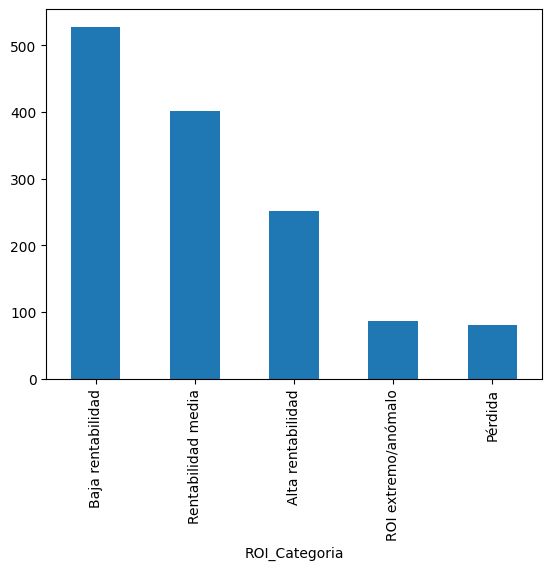

In [216]:
df['ROI_Categoria'].value_counts().plot(kind='bar')

In [217]:
# Se elimina la columna ROI original
df = df.drop('ROI', axis=1)

In [218]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,ROI_Categoria
0,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005597,Rentabilidad media
1,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005597,Rentabilidad media
2,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005597,Rentabilidad media
3,Ace Law Group,Pueblo Medical Imaging,Lien,0.000178,0.005597,Baja rentabilidad
5,Ace Law Group,LVR,Imaging,0.000178,0.006003,Rentabilidad media


In [219]:
#Variables categóricas con más de 2 categorías -> No borramos
df = pd.get_dummies(df, columns=['Account Name','Provider Client','Subject'], drop_first=False, dtype=int)

In [220]:
#LabelEncoder para la variable objetivo
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["ROI_Categoria"]=labelencoder.fit_transform(df["ROI_Categoria"])
df.head()

,Bill Amt,Purch Amt,ROI_Categoria,Account Name_Ace Law Group,Account Name_Adamson Ahdoot LLP,Account Name_Agwara Law,Account Name_Allen Injury Law LLC,Account Name_Angulo Law Group,Account Name_Atkinson Watkins & Hoffman Attorneys,Account Name_Ayala Morgan & Buzzard,...,Subject_Chiropractic,Subject_Evaluation,Subject_Imaging,Subject_Lien,Subject_Medical Device,Subject_Neurology,Subject_Orthopedics,Subject_Pain Management,Subject_Physical Therapy,Subject_Surgery
0,0.000178,0.005597,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.000178,0.005597,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.000178,0.005597,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.000178,0.005597,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0.000178,0.006003,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [221]:
df.head(50)

,Bill Amt,Purch Amt,ROI_Categoria,Account Name_Ace Law Group,Account Name_Adamson Ahdoot LLP,Account Name_Agwara Law,Account Name_Allen Injury Law LLC,Account Name_Angulo Law Group,Account Name_Atkinson Watkins & Hoffman Attorneys,Account Name_Ayala Morgan & Buzzard,...,Subject_Chiropractic,Subject_Evaluation,Subject_Imaging,Subject_Lien,Subject_Medical Device,Subject_Neurology,Subject_Orthopedics,Subject_Pain Management,Subject_Physical Therapy,Subject_Surgery
0,0.000178,0.005597,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.000178,0.005597,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.000178,0.005597,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.000178,0.005597,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0.000178,0.006003,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0.000178,0.006003,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,0.000178,0.006003,2,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,0.000178,0.006003,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,0.000178,0.006003,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15,0.000178,0.006003,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [222]:
df.to_csv('data_prepared.csv')